# Data 190: Capstone
# Name: Andres Quintero

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Reviews dataset for Los Angeles, Seattle and San Francisco

In [2]:
LA_reviews = pd.read_csv('LA_reviews.csv')

# Get the number of rows and columns for Los Angeles Review Dataset
LA_reviews_rows = len(LA_reviews.axes[0]) 
LA_reviews_cols = len(LA_reviews.axes[1]) 

# Print the number of rows and columns for Los Angeles Review Dataset
print("Number of Rows in Los Angeles Dataset is: " + str(LA_reviews_rows)) 
print("Number of Columns in Los Angeles Dataset is: " + str(LA_reviews_cols)) 

# Print first 5 rows for Los Angeles
LA_reviews.head()

Number of Rows in Los Angeles Dataset is: 1069848
Number of Columns in Los Angeles Dataset is: 6


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...


In [3]:
Seattle_reviews = pd.read_csv('Seattle_reviews.csv')

# Get the number of rows and columns for Seattle Review Dataset
Seattle_reviews_rows = len(Seattle_reviews.axes[0]) 
Seattle_reviews_cols = len(Seattle_reviews.axes[1])

# Print the number of rows and columns for Seattle Review Dataset
print("Number of Rows in Seattle Dataset is: " + str(Seattle_reviews_rows)) 
print("Number of Columns in Seattle Dataset is: " + str(Seattle_reviews_cols)) 

# Print first 5 rows for Seattle
Seattle_reviews.head()

Number of Rows in Seattle Dataset is: 260964
Number of Columns in Seattle Dataset is: 6


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


In [4]:
SF_reviews = pd.read_csv('SF_reviews.csv')


# Get the number of rows and columns for San Francisco Review Dataset
SF_reviews_rows = len(SF_reviews.axes[0]) 
SF_reviews_cols = len(SF_reviews.axes[1])

# Print the number of rows and columns for San Francisco Review Dataset
print("Number of Rows in San Francisco Dataset is: " + str(SF_reviews_rows)) 
print("Number of Columns in San Francisco Dataset is: " + str(SF_reviews_cols)) 

# Print first 5 rows for San Francisco
SF_reviews.head()

Number of Rows in San Francisco Dataset is: 296458
Number of Columns in San Francisco Dataset is: 6


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


## Handling our missing data in our reviews Datasets. I chose not to merged this datasets because I want to compared the sentiment analysis across each city.

In [5]:
LA_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069848 entries, 0 to 1069847
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1069848 non-null  int64 
 1   id             1069848 non-null  int64 
 2   date           1069848 non-null  object
 3   reviewer_id    1069848 non-null  int64 
 4   reviewer_name  1069844 non-null  object
 5   comments       1068844 non-null  object
dtypes: int64(3), object(3)
memory usage: 49.0+ MB


In [6]:
SF_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296458 entries, 0 to 296457
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     296458 non-null  int64 
 1   id             296458 non-null  int64 
 2   date           296458 non-null  object
 3   reviewer_id    296458 non-null  int64 
 4   reviewer_name  296458 non-null  object
 5   comments       296321 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.6+ MB


In [7]:
Seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260964 entries, 0 to 260963
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     260964 non-null  int64 
 1   id             260964 non-null  int64 
 2   date           260964 non-null  object
 3   reviewer_id    260964 non-null  int64 
 4   reviewer_name  260964 non-null  object
 5   comments       260846 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.9+ MB


#### All three of our datasets have the same columns. We are going to drop the following columns as we won't need it for our sentiments analysis.

In [8]:
LA_cols_to_drop_review = ['reviewer_id', 'listing_id', 'id', 'reviewer_name']
LA_reviews = LA_reviews.drop(LA_cols_to_drop_review, axis=1)

In [9]:
SF_cols_to_drop_review = ['reviewer_id', 'listing_id', 'id', 'reviewer_name']
SF_reviews = SF_reviews.drop(SF_cols_to_drop_review, axis=1)

In [10]:
Sea_cols_to_drop_review = ['reviewer_id', 'listing_id', 'id', 'reviewer_name']
Seattle_reviews = Seattle_reviews.drop(SF_cols_to_drop_review, axis=1)

#### Checking for duplicates in our review datasets

In [11]:
LA_all_review_dups = LA_reviews[LA_reviews.duplicated(keep='last')]
LA_all_review_dups.shape

(3890, 2)

We have 3,890 duplicated values in our review dataset. Let's dropped them now.

In [12]:
LA_reviews.drop_duplicates(keep=False,inplace=True) 

In [13]:
LA_reviews[LA_reviews.duplicated(keep='last')].shape

(0, 2)

We no longer have any more duplicates values we are now going to do the same for San Francisco and Seattle.

In [14]:
SF_all_review_dups = SF_reviews[SF_reviews.duplicated(keep='last')]
SF_all_review_dups.shape

(198, 2)

In [15]:
SF_reviews.drop_duplicates(keep=False,inplace=True) 

In [16]:
SF_reviews[SF_reviews.duplicated(keep='last')].shape

(0, 2)

We no longer have duplicates values for San Francisco. Let's check our Seattle Review dataset.

In [17]:
Seattle_all_review_dups = Seattle_reviews[Seattle_reviews.duplicated(keep='last')]
Seattle_all_review_dups.shape

(166, 2)

In [18]:
Seattle_reviews.drop_duplicates(keep=False,inplace=True) 

In [19]:
Seattle_reviews[Seattle_reviews.duplicated(keep='last')].shape

(0, 2)

#### We no longer have duplicated values. We are not going to be checking to see if we have any missing values in our review dataset

In [20]:
LA_null_all_review_data = LA_reviews[LA_reviews.isnull().values.any(axis=1)]
print("The number of missing values for our listing dataset is: ", LA_null_all_review_data.shape)

LA_null_all_review_data.head()

The number of missing values for our listing dataset is:  (437, 2)


,date,comments
662,2019-02-11,NaN
5999,2019-08-31,NaN
6357,2017-09-04,NaN
12729,2019-12-01,NaN
16162,2018-08-23,NaN


There are 437 missing data. In this case we are going to drop all the missing values as we cannot replace any content for the comments data.

In [21]:
LA_reviews = LA_reviews.dropna()

LA_null_data = LA_reviews[LA_reviews.isnull().values.any(axis=1)]
LA_null_data.shape

(0, 2)

In [22]:
LA_reviews.head()

,date,comments
0,2011-08-15,The host canceled my reservation the day befor...
1,2016-05-15,Me and two friends stayed for four and a half ...
2,2014-06-09,i had a wonderful stay. Everything from start ...
3,2014-06-23,Charles is just amazing and he made my stay sp...
4,2015-07-25,Staying with Chas was an absolute pleasure. He...


In [23]:
LA_reviews.shape

(1062474, 2)

Our LA review dataset has 1062474 rows and 2 columns. Let's do the same process for our San Francisco dataset.

In [24]:
SF_null_all_review_data = SF_reviews[SF_reviews.isnull().values.any(axis=1)]
print("The number of missing values for our listing dataset is: ", SF_null_all_review_data.shape)

SF_null_all_review_data.head()

The number of missing values for our listing dataset is:  (115, 2)


,date,comments
7339,2019-06-02,NaN
25095,2020-02-19,NaN
27901,2019-10-12,NaN
30481,2019-07-03,NaN
34401,2020-09-20,NaN


In [25]:
SF_reviews = SF_reviews.dropna()

SF_null_data = SF_reviews[SF_reviews.isnull().values.any(axis=1)]
SF_null_data.shape

(0, 2)

In [26]:
SF_reviews.head()

,date,comments
0,2009-07-23,"Our experience was, without a doubt, a five st..."
1,2009-08-03,Returning to San Francisco is a rejuvenating t...
2,2009-09-27,We were very pleased with the accommodations a...
3,2009-11-05,We highly recommend this accomodation and agre...
4,2010-02-13,Holly's place was great. It was exactly what I...


In [27]:
SF_reviews.shape

(295978, 2)

We have 295978 rows and 2 columns in San Francisco review dataset. Let's do the same for Seattle.

In [28]:
Seattle_null_all_review_data = Seattle_reviews[Seattle_reviews.isnull().values.any(axis=1)]
print("The number of missing values for our listing dataset is: ", Seattle_null_all_review_data.shape)

Seattle_null_all_review_data.head()

The number of missing values for our listing dataset is:  (104, 2)


,date,comments
4197,2019-08-25,NaN
17259,2018-07-22,NaN
20283,2018-07-14,NaN
25836,2018-05-20,NaN
28008,2019-01-10,NaN


In [29]:
Seattle_reviews = Seattle_reviews.dropna()

Seattle_null_data = Seattle_reviews[Seattle_reviews.isnull().values.any(axis=1)]
Seattle_null_data.shape

(0, 2)

In [30]:
Seattle_reviews.head()

,date,comments
0,2008-09-15,1000 times better than staying at a hotel.
1,2017-01-10,"Our family (two couples, a two year old and an..."
2,2017-04-01,Top of the list locations we have stayed at! T...
3,2017-04-25,"SUCH an awesome place. Very clean, quiet and s..."
4,2017-06-18,We flew quite a distance to be at our only dau...


In [31]:
Seattle_reviews.shape

(260539, 2)

We have 260,539 rows and 2 columns in our Seattle dataset.

## Exploratory Data Analysis for our reviews datasets

In [32]:
pd.options.display.float_format = "{:.2f}".format

In [33]:
print('Los Angeles review text length')
LA_reviews['comments'].str.len().describe()

Los Angeles review text length


count   1062474.00
mean        243.00
std         256.06
min           1.00
25%          84.00
50%         172.00
75%         316.00
max        5713.00
Name: comments, dtype: float64

Average Los Angeles review has 243 characters, but there are some long reviews. Let's inspect some of these

In [34]:
la_longreviews = LA_reviews[LA_reviews['comments'].str.len()>5500]

print(la_longreviews.index)
la_longreviews.shape

Int64Index([205698, 504926, 924131, 939436], dtype='int64')


(4, 2)

In [35]:
print(LA_reviews.iloc[504926]['comments'])

Claudia's Airbnb was clean, fresh smelling and beautiful. The kitchen and bath have a modern upgrade. The location was perfect for my plans. The beds were so comfortable. I looked forward to going to sleep. Everything from dishes to cleaning products were at my disposal.  I was really concerned about my late arrival time. But the self check in option was a blessing.


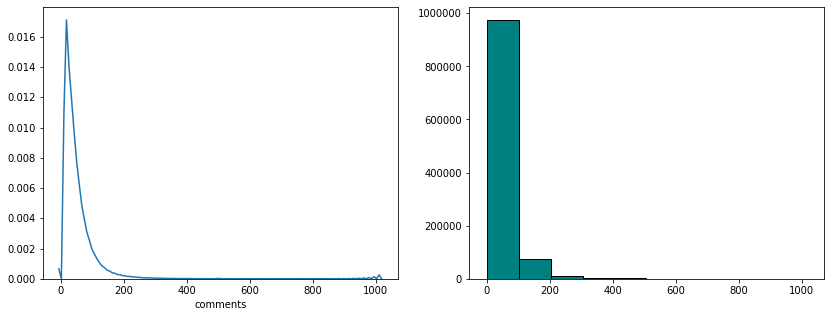

In [36]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(LA_reviews['comments'].str.split().map(lambda x: len(x)), color = 'teal', edgecolor = 'black');
sns.distplot(LA_reviews['comments'].str.split().map(lambda x: len(x)), hist=False, ax=axes[0] );

## Visualizing Los Angeles review word length

In [37]:
print('review word length')
LA_reviews['comments'].str.split().map(lambda x: len(x)).describe()

review word length


count   1062474.00
mean         43.33
std          47.01
min           0.00
25%          14.00
50%          30.00
75%          56.00
max        1013.00
Name: comments, dtype: float64

average word length is 43.

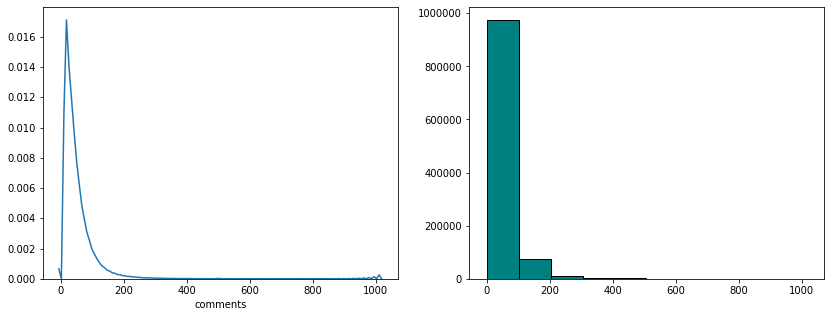

In [38]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(LA_reviews['comments'].str.split().map(lambda x: len(x)), color = 'teal', edgecolor = 'black');
sns.distplot(LA_reviews['comments'].str.split().map(lambda x: len(x)), hist=False, ax=axes[0] );

## Top Words for Los Angeles

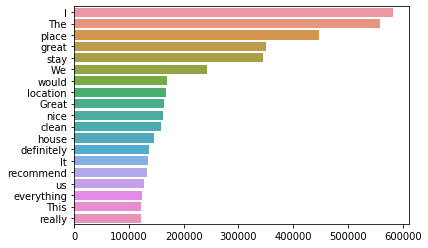

In [39]:
from nltk.corpus import stopwords
import collections
import seaborn as sns

# create the corpus for the text
corpus=[]
LA = LA_reviews['comments'].str.split().values.tolist()
corpus=[word for i in LA for word in i]


stop=set(stopwords.words('english'))
counter = collections.Counter(corpus)
most = counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x);

## San Francisco Review Analysis

In [40]:
print('San Francisco review text length')
SF_reviews['comments'].str.len().describe()

San Francisco review text length


count   295978.00
mean       277.94
std        261.52
min          1.00
25%        105.00
50%        209.00
75%        366.00
max       5319.00
Name: comments, dtype: float64

Average San Francisco review has 278 characters, but there are some long reviews. Let's inspect some of these

In [41]:
sf_longreviews = SF_reviews[SF_reviews['comments'].str.len()>5000]

print(sf_longreviews.index)
sf_longreviews.shape

Int64Index([44990], dtype='int64')


(1, 2)

In [42]:
print(SF_reviews.iloc[44990]['comments'])

Delores place was sparkling clean! She was a very attentive host, checking in with us daily, and it was an added bonus to meet her in person. We stayed in the master suite, the bed was very comfortable, the shower was wonderful, and the walk-in closet was an unexpected surprise.  Delores provided fresh fruit daily and we were very pleased with her outstanding hospitality.  We look forward to staying in her beautiful home again when we return to San Francisco.


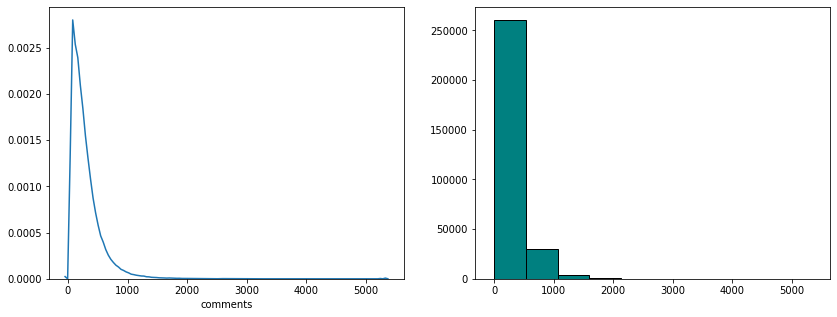

In [43]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(SF_reviews['comments'].str.len(), color = 'teal', edgecolor = 'black')
sns.distplot(SF_reviews['comments'].str.len(), hist=False, ax=axes[0]);

## Visualing Word Lenghts for San Francisco Review Dataset

In [44]:
print('review word length')
SF_reviews['comments'].str.split().map(lambda x: len(x)).describe()

review word length


count   295978.00
mean        49.30
std         47.60
min          0.00
25%         18.00
50%         37.00
75%         65.00
max       1000.00
Name: comments, dtype: float64

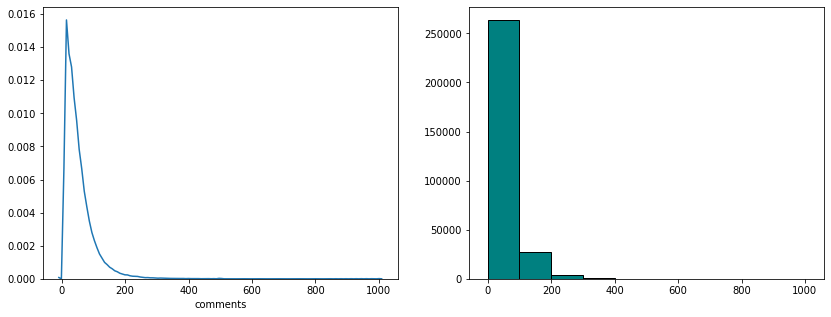

In [45]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(SF_reviews['comments'].str.split().map(lambda x: len(x)), color = 'teal', edgecolor = 'black');
sns.distplot(SF_reviews['comments'].str.split().map(lambda x: len(x)), hist=False, ax=axes[0] );

## Top Words for San Francisco

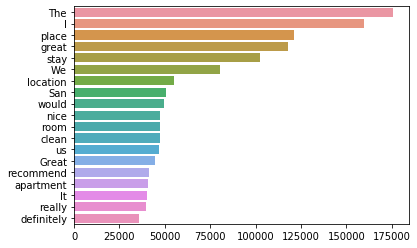

In [46]:
# create the corpus for the text
corpus=[]
SF = SF_reviews['comments'].str.split().values.tolist()
corpus=[word for i in SF for word in i]


stop=set(stopwords.words('english'))
counter = collections.Counter(corpus)
most = counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x);

## Seattle Review Analysis

In [47]:
print('Seattle review text length')
Seattle_reviews['comments'].str.len().describe()

Seattle review text length


count   260539.00
mean       263.94
std        251.47
min          1.00
25%        101.00
50%        198.00
75%        346.00
max       5514.00
Name: comments, dtype: float64

Average Seattle review has 263 characters, but there are some long reviews. Let's inspect some of these

In [48]:
seattle_longreviews = Seattle_reviews[Seattle_reviews['comments'].str.len()>5200]

print(seattle_longreviews.index)
seattle_longreviews.shape

Int64Index([8729, 120287, 131237, 224356, 241782, 259993], dtype='int64')


(6, 2)

In [49]:
print(Seattle_reviews.iloc[8729]['comments'])

Great location for Seattle Center and Downtown access.  Serina was very nice, and the apartment was as pictured.  Off-street parking garage was very useful and the access to the public bus lines was also great.


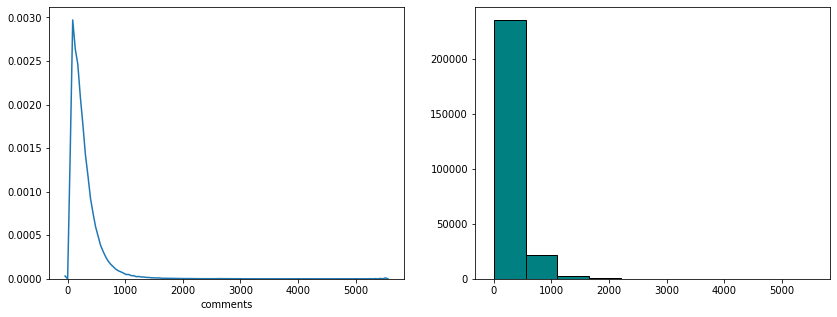

In [50]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(Seattle_reviews['comments'].str.len(), color = 'teal', edgecolor = 'black')
sns.distplot(Seattle_reviews['comments'].str.len(), hist=False, ax=axes[0]);

## Visualing Word Lenghts for Seattle Review Dataset

In [51]:
print('review word length')
Seattle_reviews['comments'].str.split().map(lambda x: len(x)).describe()

review word length


count   260539.00
mean        46.63
std         45.69
min          0.00
25%         17.00
50%         35.00
75%         61.00
max       1000.00
Name: comments, dtype: float64

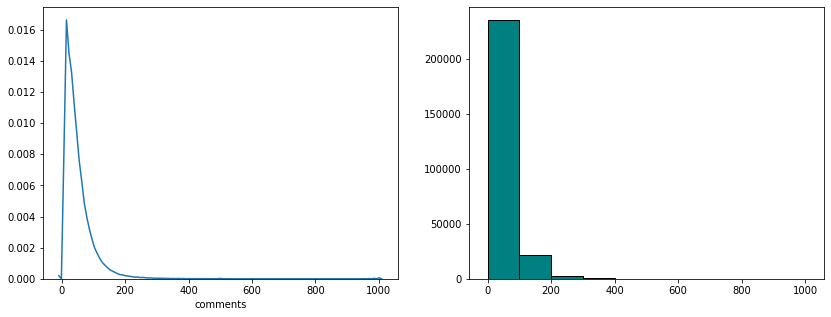

In [52]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(Seattle_reviews['comments'].str.split().map(lambda x: len(x)), color = 'teal', edgecolor = 'black');
sns.distplot(Seattle_reviews['comments'].str.split().map(lambda x: len(x)), hist=False, ax=axes[0] );

## Top Words for Seattle

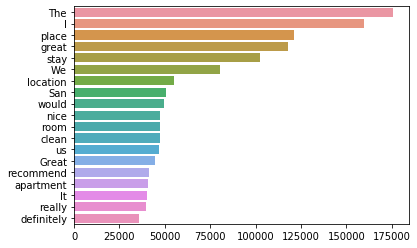

In [53]:
# create the corpus for the text
corpus=[]
Seattle = Seattle_reviews['comments'].str.split().values.tolist()
corpus=[word for i in SF for word in i]


stop=set(stopwords.words('english'))
counter = collections.Counter(corpus)
most = counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x);

## Analysis of Seattle Review dataset

In [54]:
# we use Python's langdetect 
from langdetect import detect

In [55]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [56]:
#%%time
#Seattle_reviews['language'] = Seattle_reviews['comments'].apply(language_detection)

In [57]:
# write the dataframe to a csv file in order to avoid the long runtime
#Seattle_reviews.to_csv('processed_df', index=False)
Seattle_reviews = pd.read_csv('processed_df')

In [58]:
Seattle_reviews.language.value_counts().head(10)

en       254418
fr          928
zh-cn       782
ro          705
de          627
ko          543
es          441
af          262
so          197
ca          168
Name: language, dtype: int64

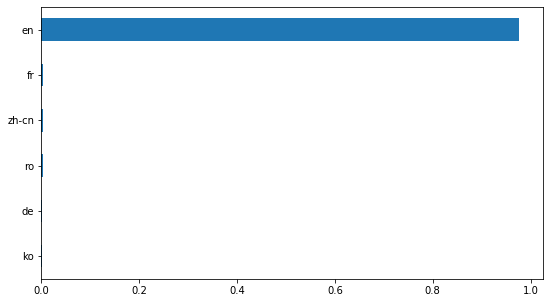

In [59]:
# visualizing the comments' languages
ax = Seattle_reviews.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

In [60]:
# splitting the dataframes in language related sub-dataframes
df_eng = Seattle_reviews[(Seattle_reviews['language']=='en')]
df_fr  = Seattle_reviews[(Seattle_reviews['language']=='fr')]

In [61]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [62]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

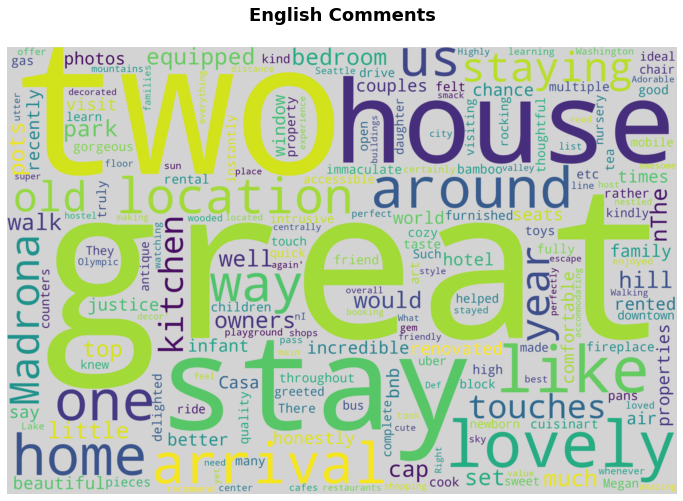

In [63]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

In [64]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [65]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [66]:
print_sentiment_scores("This raspberry cake is good.")

This raspberry cake is good.------------ {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}


In [67]:
print_sentiment_scores("This raspberry cake is good.")
print_sentiment_scores("This raspberry cake is GOOD!")
print_sentiment_scores("This raspberry cake is VERY GOOD!!")
print_sentiment_scores("This raspberry cake is really GOOD! But the coffee is dreadful.")

This raspberry cake is good.------------ {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
This raspberry cake is GOOD!------------ {'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.6027}
This raspberry cake is VERY GOOD!!------ {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.7386}
This raspberry cake is really GOOD! But the coffee is dreadful. {'neg': 0.18, 'neu': 0.558, 'pos': 0.262, 'compound': 0.3222}


In [68]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [69]:
negative_score("The food is really GOOD! But the service is dreadful.")

0.192

In [70]:
neutral_score("The food is really GOOD! But the service is dreadful.")

0.529

In [71]:
positive_score("The food is really GOOD! But the service is dreadful.")

0.279

In [72]:
compound_score("The food is really GOOD! But the service is dreadful.")

0.3222

In [78]:
%%time

df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

CPU times: user 7min 45s, sys: 1.51 s, total: 7min 47s
Wall time: 7min 47s


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [79]:
# write the dataframe to a csv file in order to avoid the long runtime
df_eng.to_csv('sentiment_df_eng', index=False)
df = pd.read_csv('sentiment_df_eng')
df = df_eng

In [80]:
df.head(2)

,date,comments,vader_score,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,2008-09-15,1000 times better than staying at a hotel.,1,en,0.00,0.67,0.33,0.44
1,2017-01-10,"Our family (two couples, a two year old and an...",1,en,0.02,0.74,0.24,1.00


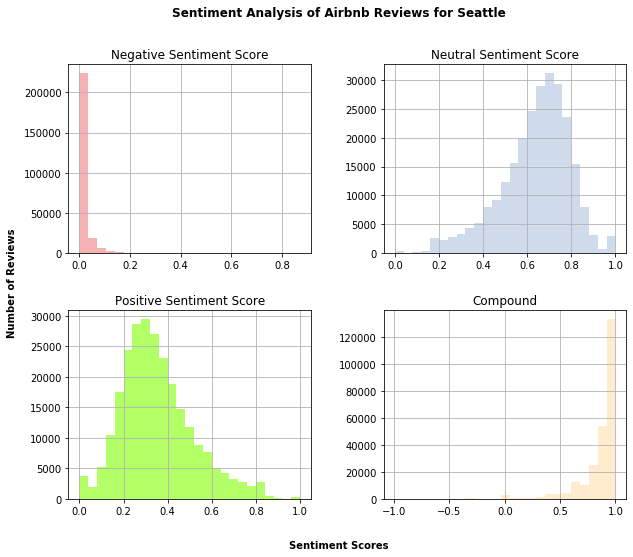

In [81]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Seattle\n\n', fontsize=12, fontweight='bold');

In [82]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count   254418.00
mean         0.85
std          0.21
min         -0.99
5%           0.48
10%          0.63
20%          0.79
30%          0.86
40%          0.90
50%          0.93
60%          0.94
70%          0.96
80%          0.97
90%          0.98
max          1.00
Name: sentiment_compound, dtype: float64

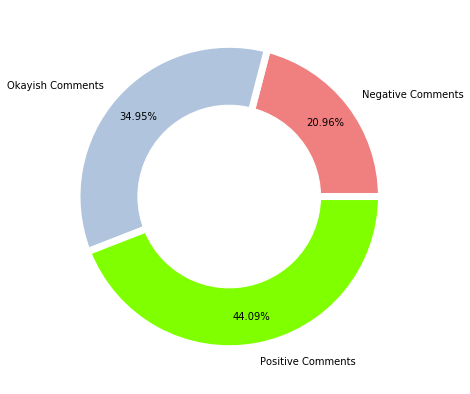

In [83]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [84]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [85]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [86]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
# read some positive comments
pos_comments[10:15]

['We returned this year to Casa Madrona after a wonderful stay last spring. The home continues to impress with thoughtful touches for kids and adults and just offers a great layout and fantastic location.  We adore Megan and appreciate her genuine hospitality.',
 'A wonderful stay! Megan was so thoughtful - a great place to visit for families. Safe, quiet location in a wonderful neighborhood! House was cozy and extremely clean!',
 'We enjoyed our 3rd stay here as a family with 3 young kids. The pictures are accurate and the location is fantastic. We love the bonus of a fenced yard, kid toys, stroller and pack n play.',
 'Megan is an amazing host!  Her house couldn’t be better, and the pictures do not do it justice. The location is great, and we felt very safe and comfortable. We will definitely stay there again!',
 "Megan's house is beautiful and worked absolutely perfect for our family of 3 with plenty of room to spare.  There is plenty of cookware and kitchen appliances which made it

In [88]:
# read some negative comments
neg_comments[10:15]

['Minor problem with arriving late at night in the dark without a totally clear map, but a quick phone call helped us locate the cabin.',
 'Everyone should stay here! Quiet, just up the block from the Fremont troll, and just a cool experience overall!',
 'nothing but great',
 'A lot of work has gone into making this a nice place, however it IS a basement   The windows are basically at street level, and it’s a busy street. To open them was extremely noisy and let in exhaust. Even closed the noise was incessant, even at night. BRING EAR PLUGS. Also, the bathroom has no windows, there is mold on the ceiling, one of us developed a night time cough that disappeared when we moved on in our travels. The lack of air circulation here is definitely a problem. It is the noisiest place I’ve ever stayed over decades of Seattle living, and visits.',
 'Stayed Jan 16 - 19. Autumn was very accomodating and answered all my questions prior to my arrival. Even though she was not available to meet us on Ja

## Los Angeles

In [89]:
%%time
LA_reviews['language'] = LA_reviews['comments'].apply(language_detection)

CPU times: user 1h 4min 51s, sys: 33.1 s, total: 1h 5min 24s
Wall time: 1h 5min 29s


In [90]:
# write the dataframe to a csv file in order to avoid the long runtime
LA_reviews.to_csv('processed_LA_df', index=False)
LA_reviews = pd.read_csv('processed_LA_df')

In [91]:
LA_reviews.language.value_counts().head(10)

en       994198
fr        12847
zh-cn      9329
es         8969
de         6847
ko         5657
ro         4383
it         1923
pt         1883
af         1864
Name: language, dtype: int64

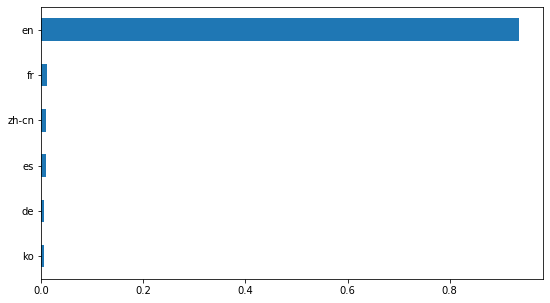

In [92]:
# visualizing the comments' languages
ax = LA_reviews.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

In [93]:
# splitting the dataframes in language related sub-dataframes
LA_df_eng = LA_reviews[(LA_reviews['language']=='en')]

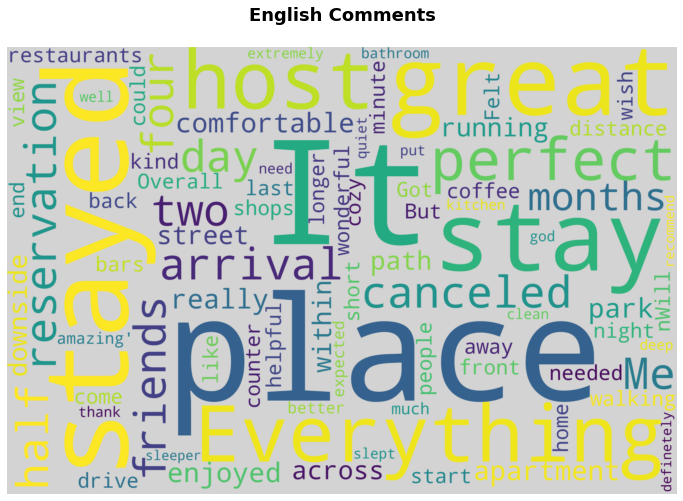

In [94]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(LA_df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

In [95]:
%%time

LA_df_eng['sentiment_neg'] = LA_df_eng['comments'].apply(negative_score)
LA_df_eng['sentiment_neu'] = LA_df_eng['comments'].apply(neutral_score)
LA_df_eng['sentiment_pos'] = LA_df_eng['comments'].apply(positive_score)
LA_df_eng['sentiment_compound'] = LA_df_eng['comments'].apply(compound_score)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

CPU times: user 29min 48s, sys: 5.49 s, total: 29min 54s
Wall time: 59min 52s


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [96]:
# write the dataframe to a csv file in order to avoid the long runtime
LA_df_eng.to_csv('sentiment_df_eng_LA', index=False)
LA_df = pd.read_csv('sentiment_df_eng_LA')
LA_df = LA_df_eng

In [97]:
LA_df.head(2)

,date,comments,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,2011-08-15,The host canceled my reservation the day befor...,en,0.00,1.00,0.00,0.00
1,2016-05-15,Me and two friends stayed for four and a half ...,en,0.03,0.71,0.27,0.96


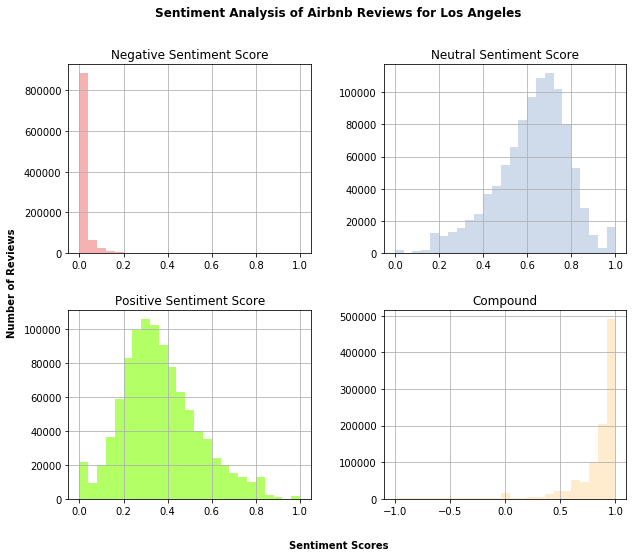

In [98]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
LA_df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
LA_df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
LA_df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
LA_df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Los Angeles\n\n', fontsize=12, fontweight='bold');

In [99]:
LA_percentiles = LA_df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
LA_percentiles

count   994198.00
mean         0.83
std          0.25
min         -1.00
5%           0.40
10%          0.60
20%          0.76
30%          0.84
40%          0.89
50%          0.92
60%          0.94
70%          0.96
80%          0.97
90%          0.98
max          1.00
Name: sentiment_compound, dtype: float64

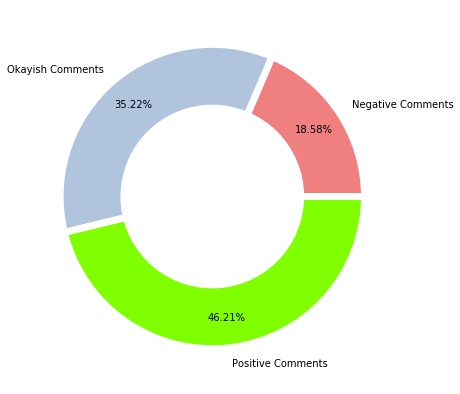

In [100]:
# assign the data
LA_neg = LA_percentiles['5%']
LA_mid = LA_percentiles['20%']
LA_pos = LA_percentiles['max']
LA_names = ['Negative Comments', 'Okayish Comments','Positive Comments']
LA_size = [LA_neg, LA_mid, LA_pos]

# call a pie chart
plt.pie(LA_size, labels=LA_names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
LA_my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(LA_my_circle)
plt.show()

In [101]:
# full dataframe with POSITIVE comments
LA_df_pos = LA_df.loc[LA_df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
LA_pos_comments = LA_df_pos['comments'].tolist()

In [102]:
# full dataframe with NEGATIVE comments
LA_df_neg = LA_df.loc[LA_df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
LA_neg_comments = LA_df_neg['comments'].tolist()

In [103]:
LA_df_pos['text_length'] = LA_df_pos['comments'].apply(len)
LA_df_neg['text_length'] = LA_df_neg['comments'].apply(len)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
# read some positive comments
LA_pos_comments[10:15]

["Chas is an amazing host and I absolutely recommend his place. It's very clean, you have enough privacy and the location is great too, as there is everything like restaurants, grocery and metro station in walking distance. I had an awesome time there and really enjoyed my stay!",
 'Chas. is an excellent host, and this is a great location and a great space. Chas. was very accommodating even when my flight was delayed, and he was always willing to go the extra mile to make sure that I was happy with everything about my stay. This is a great location even if you do not have a car, since public transportation is plentiful in this area and there are also a lot of restaurants and shops in easy walking distance, but Chas. also made it easy for me to park my car in his building. All in all, this was a great stay, and I highly recommend it.',
 'I had an amazing time at Charles place. He made me feel very welcome and comfortable. The location is amazing and you can find many shops and restauran

In [105]:
# read some negative comments
LA_neg_comments[10:15]

['Cute & cozy  outrage within 5 min walking distance from Redondo Pier. ',
 'Janet could not have been more accomodating, and the room had a Zen simplicity that was very appealing.  This is a very quiet location, which lends itself to restful sleep.   Only one reservation - if you are very tall (over 6\'0") you may find the bed a bit short, otherwise no problem. ',
 'It was a sanctuary amid the chaos of the city.',
 "This space would have been great if there hadn't been a break in while I was in my room Friday morning.  A woman who was seen acting erratic in the back yard entered the upstairs window by a ladder that was left outside by an electrician working in the house. She tried to steal some of Janet's belongings, the electrician caught her and held her while Janet watched and I had to call the police. They handcuffed the woman and took her away. I had a busy weekend of work and while I was unsettled I didn't have much time to focus on the situation until I was woken up in the midd

## San Francisco 

In [106]:
%%time
SF_reviews['language'] = SF_reviews['comments'].apply(language_detection)

CPU times: user 17min 58s, sys: 9.82 s, total: 18min 8s
Wall time: 33min 26s


In [107]:
# write the dataframe to a csv file in order to avoid the long runtime
SF_reviews.to_csv('processed_SF_df', index=False)
SF_reviews = pd.read_csv('processed_SF_df')

In [108]:
SF_reviews.language.value_counts().head(10)

en       276170
fr         5543
de         3239
es         2675
zh-cn      1691
ko         1401
ro          730
it          615
pt          487
nl          465
Name: language, dtype: int64

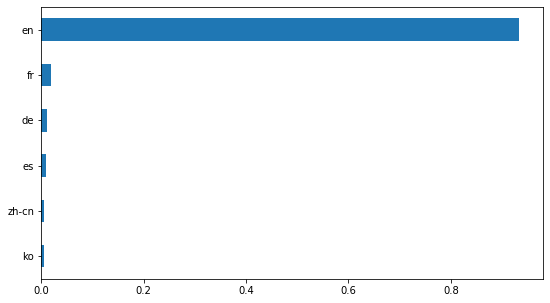

In [109]:
# visualizing the comments' languages
ax_SF = SF_reviews.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

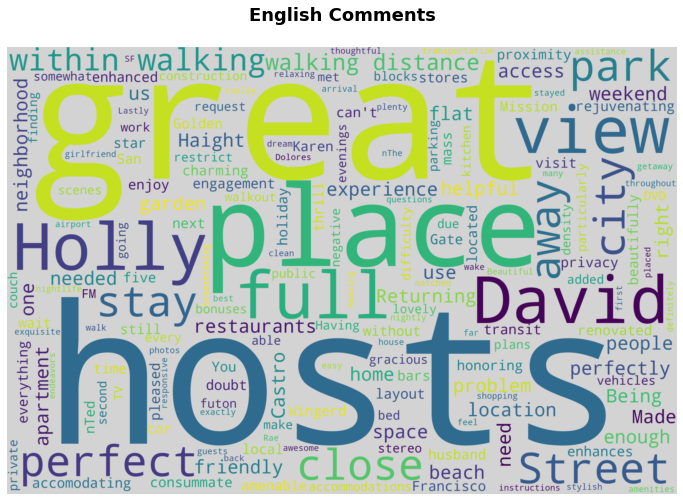

In [110]:
# splitting the dataframes in language related sub-dataframes
SF_df_eng = SF_reviews[(SF_reviews['language']=='en')]

wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(SF_df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

In [115]:
%%time

SF_df_eng['sentiment_neg'] = SF_df_eng['comments'].apply(negative_score)
SF_df_eng['sentiment_neu'] = SF_df_eng['comments'].apply(neutral_score)
SF_df_eng['sentiment_pos'] = SF_df_eng['comments'].apply(positive_score)
SF_df_eng['sentiment_compound'] = SF_df_eng['comments'].apply(compound_score)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

CPU times: user 8min 45s, sys: 1.19 s, total: 8min 46s
Wall time: 8min 46s


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [116]:
# write the dataframe to a csv file in order to avoid the long runtime
SF_df_eng.to_csv('sentiment_df_eng_SF', index=False)
SF_df = pd.read_csv('sentiment_df_eng_SF')
SF_df = SF_df_eng

In [117]:
SF_df.head(2)

,date,comments,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,2009-07-23,"Our experience was, without a doubt, a five st...",en,0.00,0.79,0.21,0.96
1,2009-08-03,Returning to San Francisco is a rejuvenating t...,en,0.00,0.70,0.30,0.98


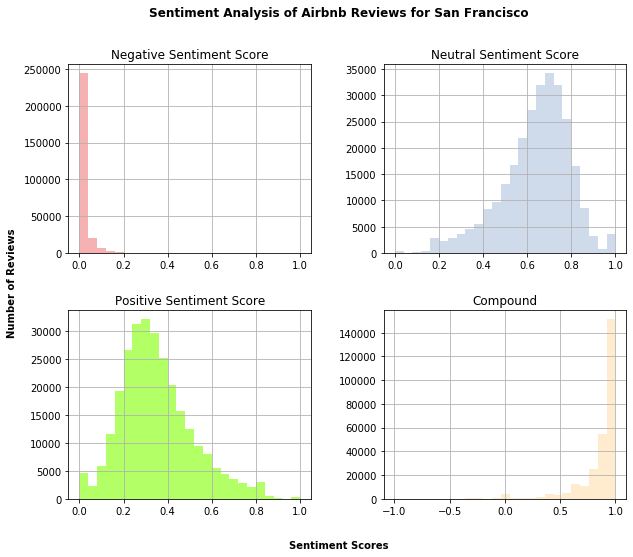

In [118]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
SF_df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
SF_df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
SF_df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
SF_df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for San Francisco\n\n', fontsize=12, fontweight='bold');

In [119]:
SF_percentiles = SF_df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
SF_percentiles

count   276170.00
mean         0.85
std          0.22
min         -1.00
5%           0.44
10%          0.62
20%          0.80
30%          0.87
40%          0.91
50%          0.93
60%          0.95
70%          0.96
80%          0.97
90%          0.98
max          1.00
Name: sentiment_compound, dtype: float64

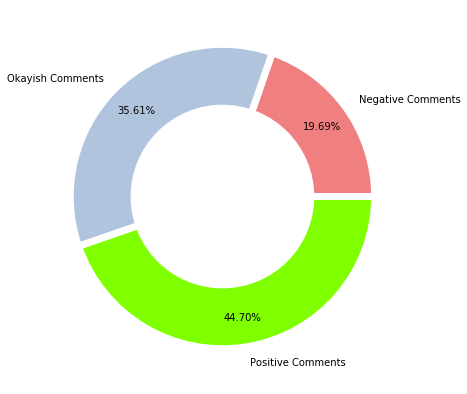

In [120]:
# assign the data
SF_neg = SF_percentiles['5%']
SF_mid = SF_percentiles['20%']
SF_pos = SF_percentiles['max']
SF_names = ['Negative Comments', 'Okayish Comments','Positive Comments']
SF_size = [SF_neg, SF_mid, SF_pos]

# call a pie chart
plt.pie(SF_size, labels=SF_names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
SF_my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(SF_my_circle)
plt.show()

In [121]:
# full dataframe with POSITIVE comments
SF_df_pos = SF_df.loc[SF_df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
SF_pos_comments = SF_df_pos['comments'].tolist()

In [122]:
# full dataframe with NEGATIVE comments
SF_df_neg = SF_df.loc[SF_df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
SF_neg_comments = SF_df_neg['comments'].tolist()

In [123]:
SF_df_pos['text_length'] = SF_df_pos['comments'].apply(len)
SF_df_neg['text_length'] = SF_df_neg['comments'].apply(len)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
# read some positive comments
SF_pos_comments[10:15]

['Truly amazing place - great location near Haight Street, close to Muni station, 100 feet from a lovely park. The house itself is very clean, lovely decorated, with fully equipped kitchen and beautiful garden. Holly is super responsive and welcoming. Would definitely stay here again.',
 "We really enjoyed staying in this cute, and airy garden apartment. It was a little cramped for me and my 2 teen boys, but we had everything we needed. The kitchen was very complete and clean which was great because we cooked a lot. Parking was easy to find and free, though we had to move the car very 2 hours (which was only difficult in the evening). Great location. The neighborhood is beautiful, and we loved being right next to the little park. We'd definitely like to return!",
 'This was the perfect little rental suite. It was equipped with everything you need including cookware. The place was clean and very cute. A nice addition was the use of the yard, great to eat lunch in the sun. We thought the

In [125]:
# read some negative comments
SF_neg_comments[10:15]

["Lisa's place was very clean and cute.  I really appreciate that there were no unnecessary objects or clutter.\r\n\r\nWe had to leave fairly early due to back to back bookings which was a drag but not too big of a deal.\r\n\r\nMy one complaint would be the $80 cleaning fee.  That seemed high and I think should just be included in the price of renting the unit.  It smacks of a hidden fee you would be charged at a hotel.",
 'We stayed 3 times during our visit to California in two differents studios. The garden suite is a bit bigger. You have more view at the first foor.\r\nWe will probably call her during our next stop in San Francisco.',
 "It was okay. \n\nLovely area. Close to gorgeous restaurants and cafes. Ample street parking. The garden is spectacular but it's really not worth the money. \n\nThe room is quite dated. There are strange plush toys decorating the room. \n\nPlease look at the additional costs. The cleaning fee is over $100aud approx $85 usd and the room is about 25sqm 